<b><font size="5">Question 3a)<br>
    </font>
In Spark ML (not pandas): given the hard drive logs for 2019 Q1, implement a point anomaly detector for: a) Annualized Failure Rate (by model)<br> For generating training labels, use a) 2%

#Reference: https://towardsdatascience.com/create-your-first-etl-pipeline-in-apache-spark-and-python-ec3d12e2c169<br>
https://spark.apache.org/docs/latest/ml-clustering.html

In [1]:
#Creating spark session
from pyspark.sql import SparkSession

spark = SparkSession\
        .builder\
        .appName("Big Data Q3")\
        .getOrCreate()
sc = spark.sparkContext

In [2]:
sc

<SparkContext master=local[*] appName=Big Data Q3>

In [3]:
#Using my local path to load the data
df_data = spark.read.format("csv") \
.option("header", "true") \
.option("infer_schema","true")\
.option("first_row_is_header","true")\
.load(r"C:\Users\palak\Desktop\college\Big Data\Data\data_Q2_SP20\drive_stats_2019_Q1\*.csv")

In [4]:
#create a table using registerTempTable named drive_stats
df_data.registerTempTable("drive_stats")
df_data.show()

+----------+--------------+--------------------+--------------+-------+------------------+-----------+------------------+-----------+------------------+-----------+------------------+-----------+------------------+-----------+------------------+-----------+------------------+-----------+------------------+-----------+-------------------+------------+-------------------+------------+-------------------+------------+-------------------+------------+-------------------+------------+-------------------+------------+-------------------+------------+-------------------+------------+-------------------+------------+-------------------+------------+--------------------+-------------+--------------------+-------------+--------------------+-------------+--------------------+-------------+--------------------+-------------+--------------------+-------------+--------------------+-------------+--------------------+-------------+--------------------+-------------+--------------------+-------------+-

#Reference taken from docs_Q3_SP20.zip provided in the datasets. 

In [5]:
# used sql query to get the drive days.
drive_days_data=spark.sql("SELECT model, count(*) AS drive_days FROM drive_stats GROUP BY model")
#saving dataframe to table
drive_days_data.registerTempTable("drive_days")

In [6]:
#Showing the result of the above query
drive_days_data.show()

+--------------------+----------+
|               model|drive_days|
+--------------------+----------+
|         ST4000DM000|   1989429|
|       ST12000NM0007|   2955025|
|         ST8000DM005|      2250|
|          ST320LT007|        85|
| TOSHIBA MQ01ABF050M|     32624|
|        ST8000NM0055|   1294451|
|Seagate BarraCuda...|       265|
| TOSHIBA MG07ACA14TA|    109404|
|        WDC WD60EFRX|     30523|
|         ST8000DM002|    888741|
|         ST4000DM005|      4848|
|         DELLBOSS VD|       540|
|HGST HUS726040ALE610|      2598|
|     TOSHIBA HDWF180|      1798|
|HGST HMS5C4040ALE640|    313383|
|HGST HUH721010ALE600|      1245|
| TOSHIBA MD04ABA500V|      4050|
| TOSHIBA MD04ABA400V|     12662|
|       ST10000NM0086|    108555|
|      WDC WD2500AAJS|        88|
+--------------------+----------+
only showing top 20 rows



In [6]:
# used sql query to get the failures.
failures_data=spark.sql("SELECT model, count(*) AS failures FROM drive_stats WHERE failure = 1 GROUP BY model")
#saving dataframe to table
failures_data.registerTempTable("failures")

In [8]:
#Showing the result of the above query
failures_data.show()

+--------------------+--------+
|               model|failures|
+--------------------+--------+
|         ST4000DM000|     107|
|       ST12000NM0007|     180|
| TOSHIBA MQ01ABF050M|       3|
|        ST8000NM0055|      58|
|        WDC WD60EFRX|       1|
| TOSHIBA MG07ACA14TA|       1|
|         ST8000DM002|      29|
|HGST HMS5C4040ALE640|       2|
|       ST10000NM0086|       3|
|  TOSHIBA MQ01ABF050|      14|
|HGST HMS5C4040BLE640|      11|
|         ST6000DX000|       1|
|      WDC WD5000LPVX|       2|
|          ST500LM030|       9|
|       ST500LM012 HN|      12|
|HGST HUH728080ALE600|       3|
|HGST HUH721212ALE600|       1|
|      WDC WD5000LPCX|       2|
|         ST8000DM004|       1|
|HGST HUH721212ALN604|       4|
+--------------------+--------+



In [7]:
# used sql query to get the failures.
model_count_data=spark.sql("SELECT model, count(*) AS count FROM drive_stats WHERE date = '2019-01-01' GROUP BY model")
#saving dataframe to table
model_count_data.registerTempTable("model_count")

In [10]:
#Showing the result of the above query
model_count_data.show()

+--------------------+-----+
|               model|count|
+--------------------+-----+
|         ST4000DM000|23236|
|       ST12000NM0007|31147|
|         ST8000DM005|   25|
|          ST320LT007|    1|
| TOSHIBA MQ01ABF050M|  354|
|        ST8000NM0055|14383|
|Seagate BarraCuda...|    1|
| TOSHIBA MG07ACA14TA| 1204|
|        WDC WD60EFRX|  382|
|         ST8000DM002| 9874|
|         ST4000DM005|   58|
|HGST HUS726040ALE610|   28|
|     TOSHIBA HDWF180|   20|
|HGST HMS5C4040ALE640| 4678|
|HGST HUH721010ALE600|   10|
| TOSHIBA MD04ABA500V|   45|
| TOSHIBA MD04ABA400V|  145|
|       ST10000NM0086| 1210|
|      WDC WD2500AAJS|    1|
|  TOSHIBA MQ01ABF050|  528|
+--------------------+-----+
only showing top 20 rows



In [8]:
#running sql join query to calculate annual_failure_rate
annual_failure_rates=spark.sql("SELECT drive_days.model AS model,drive_days.drive_days AS drive_days,failures.failures AS failures, 100.0 * (1.0 * failures) / (drive_days / 365.0) AS annual_failure_rate FROM drive_days,failures,model_count WHERE drive_days.model = failures.model AND model_count.model = failures.model ORDER BY model")

In [12]:
#Showing the result of the above query
annual_failure_rates.show()

+--------------------+----------+--------+-------------------+
|               model|drive_days|failures|annual_failure_rate|
+--------------------+----------+--------+-------------------+
|HGST HMS5C4040ALE640|    313383|       2|           0.232942|
|HGST HMS5C4040BLE640|   1172824|      11|           0.342336|
|HGST HUH721212ALN604|    259749|       4|           0.562081|
|HGST HUH728080ALE600|     93598|       3|           1.169897|
|       ST10000NM0086|    108555|       3|           1.008705|
|       ST12000NM0007|   2955025|     180|           2.223331|
|         ST4000DM000|   1989429|     107|           1.963126|
|       ST500LM012 HN|     50619|      12|           8.652877|
|          ST500LM030|     14479|       9|          22.688031|
|         ST6000DX000|    135832|       1|           0.268714|
|         ST8000DM002|    888741|      29|           1.191011|
|         ST8000DM004|       273|       1|         133.699670|
|        ST8000NM0055|   1294451|      58|           1.

In [9]:
#Importing spark.ml.feature vectorassembler
from pyspark.ml.feature import VectorAssembler

In [10]:
annual_failure_rates.registerTempTable("failure_rates")

In [11]:
#creating a vector from the dataframe. Using annual failure rate for k means clustering algorithm
vecAssembler = VectorAssembler(inputCols=['annual_failure_rate'],outputCol='features')
df_annual_failure_rates=annual_failure_rates
df_k_means = vecAssembler.setHandleInvalid("skip").transform(df_annual_failure_rates).na.drop()

In [16]:
#Showing the above result
df_k_means.show()

+--------------------+----------+--------+-------------------+-----------+
|               model|drive_days|failures|annual_failure_rate|   features|
+--------------------+----------+--------+-------------------+-----------+
|HGST HMS5C4040ALE640|    313383|       2|           0.232942| [0.232942]|
|HGST HMS5C4040BLE640|   1172824|      11|           0.342336| [0.342336]|
|HGST HUH721212ALN604|    259749|       4|           0.562081| [0.562081]|
|HGST HUH728080ALE600|     93598|       3|           1.169897| [1.169897]|
|       ST10000NM0086|    108555|       3|           1.008705| [1.008705]|
|       ST12000NM0007|   2955025|     180|           2.223331| [2.223331]|
|         ST4000DM000|   1989429|     107|           1.963126| [1.963126]|
|       ST500LM012 HN|     50619|      12|           8.652877| [8.652877]|
|          ST500LM030|     14479|       9|          22.688031|[22.688031]|
|         ST6000DX000|    135832|       1|           0.268714| [0.268714]|
|         ST8000DM002|   

#Reference taken from https://runawayhorse001.github.io/LearningApacheSpark/clustering.html <br>
                      https://spark.apache.org/docs/2.0.0-preview/ml-clustering.html

In [15]:
#Importing kmeans
from pyspark.ml.clustering import KMeans

Text(0, 0.5, 'cost')

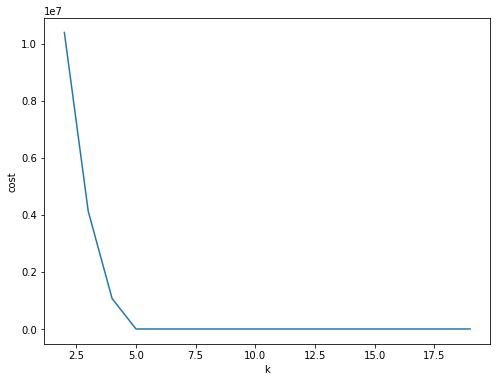

In [54]:
#for kmeans algorithm we need to find the optimized value of k
#kmeans().setseed() and km.fit() is used to train k means model
#calculate the cost for each value of k and select a k at the elbow point
import matplotlib.pyplot as plt  
from pyspark.ml.clustering import KMeans 
import numpy as np
cost = np.zeros(20)
X = df_k_means.sample(False,0.1,seed=2)
for i in range(2, 20): 
    KM = KMeans().setK(i).setSeed(1).setFeaturesCol('features') 
    cost[i] = KM.fit(X).computeCost(df_k_means)

#we will plot cost vs k graph to make it easier to locate the elbow point
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,20),cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [18]:
#from the graph we found that the best value of k is 5
k = 5
kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(df_k_means)

In [36]:
#shwoing Cluster Centers 
cluster_centers = model.clusterCenters()
for center in cluster_centers:
    print(center)

[1.34281264]
[133.69967]
[22.688031]
[9.7661965]
[14.837398]


In [20]:
#run the algorithm for each row in our data and predict the cluster it belongs to
transformed = model.transform(df_k_means).select('model','drive_days','failures','features','prediction','annual_failure_rate').orderBy("prediction")

In [20]:
#Importing the functions and libraries that are needed
import pyspark.sql.functions as F
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType
from scipy.spatial import distance
from pyspark.sql.functions import col

In [22]:
#Calculating the distance using distance.euclidean. 
distance_udf = F.udf(lambda x,y: float(distance.euclidean(x, cluster_centers[y])), FloatType())
df_prediction = transformed.withColumn('distance', distance_udf(F.col('features'),F.col('prediction')))

In [23]:
#Showing the result of the above query
df_prediction.show()

+--------------------+----------+--------+-----------+----------+-------------------+----------+
|               model|drive_days|failures|   features|prediction|annual_failure_rate|  distance|
+--------------------+----------+--------+-----------+----------+-------------------+----------+
|HGST HMS5C4040ALE640|    313383|       2| [0.232942]|         0|           0.232942| 1.1098707|
|HGST HMS5C4040BLE640|   1172824|      11| [0.342336]|         0|           0.342336| 1.0004766|
|HGST HUH721212ALN604|    259749|       4| [0.562081]|         0|           0.562081| 0.7807316|
|HGST HUH728080ALE600|     93598|       3| [1.169897]|         0|           1.169897|0.17291564|
|       ST10000NM0086|    108555|       3| [1.008705]|         0|           1.008705|0.33410764|
|       ST12000NM0007|   2955025|     180| [2.223331]|         0|           2.223331| 0.8805184|
|         ST4000DM000|   1989429|     107| [1.963126]|         0|           1.963126|0.62031335|
|         ST6000DX000|    1358

In [24]:
#Calculating 2% of the centers and then printing the distance that is greater than that as the outliars 
centers_filter = udf(lambda z: float(cluster_centers[z]+((2/100)*cluster_centers[z])), FloatType())
df_prediction.filter(col("distance")>=centers_filter(col("prediction"))).show()

+-------------------+----------+--------+----------+----------+-------------------+---------+
|              model|drive_days|failures|  features|prediction|annual_failure_rate| distance|
+-------------------+----------+--------+----------+----------+-------------------+---------+
|TOSHIBA MQ01ABF050M|     32624|       3|[3.356425]|         0|           3.356425|2.0136123|
|     WDC WD5000LPVX|     22015|       2|[3.315921]|         0|           3.315921|1.9731084|
+-------------------+----------+--------+----------+----------+-------------------+---------+



<b><font size = "5"> Question 3b) <br> </font>
In Spark ML (not pandas): given the hard drive logs for 2019 Q1, implement a point anomaly detector for: b) Normalized Read Error Rate, SMART attribute 1. <br> For generating training labels, use b) 100 
    
#Reference taken from https://runawayhorse001.github.io/LearningApacheSpark/clustering.html <br>
                      https://spark.apache.org/docs/2.0.0-preview/ml-clustering.html

In [12]:
#making the table with the smart_1_normalized. 
df_smart_1_normalized=df_data.select("smart_1_normalized").na.drop()
df_smart_1_normalized=df_smart_1_normalized.withColumn("smart_1_normalized",df_smart_1_normalized["smart_1_normalized"].cast("float"))
df_smart_1_normalized.createOrReplaceTempView("smart_normal")
df_smart_1_normalized.show()

+------------------+
|smart_1_normalized|
+------------------+
|             117.0|
|              80.0|
|              83.0|
|              81.0|
|             100.0|
|              75.0|
|              83.0|
|              83.0|
|              78.0|
|              77.0|
|             117.0|
|              81.0|
|              74.0|
|              80.0|
|              78.0|
|             100.0|
|             100.0|
|             100.0|
|             100.0|
|             100.0|
+------------------+
only showing top 20 rows



In [13]:
#Using Vector assembler to get the vectorized values of the smart_1_normalized that has to be evaluated 
normalized_vector= VectorAssembler(inputCols=["smart_1_normalized"], outputCol="smart_val")
prediction_vector = normalized_vector.transform(df_smart_1_normalized)
prediction_vector.show()

+------------------+---------+
|smart_1_normalized|smart_val|
+------------------+---------+
|             117.0|  [117.0]|
|              80.0|   [80.0]|
|              83.0|   [83.0]|
|              81.0|   [81.0]|
|             100.0|  [100.0]|
|              75.0|   [75.0]|
|              83.0|   [83.0]|
|              83.0|   [83.0]|
|              78.0|   [78.0]|
|              77.0|   [77.0]|
|             117.0|  [117.0]|
|              81.0|   [81.0]|
|              74.0|   [74.0]|
|              80.0|   [80.0]|
|              78.0|   [78.0]|
|             100.0|  [100.0]|
|             100.0|  [100.0]|
|             100.0|  [100.0]|
|             100.0|  [100.0]|
|             100.0|  [100.0]|
+------------------+---------+
only showing top 20 rows



In [16]:
#using kmeans algorithm
k = 5
df_kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("smart_val")
model_k_means = df_kmeans.fit(prediction_vector)

In [17]:
print("All centroids")
#This find ClusterCenters 
centers = model_k_means.clusterCenters()
centers.sort()
for center in centers:
    print(center)

All centroids
[73.74751775]
[81.49903991]
[100.38512109]
[116.09234413]
[199.99904928]


In [18]:
#showing the predicted cluster values
transformed_model = model_k_means.transform(prediction_vector)
transformed_model.show()

+------------------+---------+----------+
|smart_1_normalized|smart_val|prediction|
+------------------+---------+----------+
|             117.0|  [117.0]|         2|
|              80.0|   [80.0]|         1|
|              83.0|   [83.0]|         1|
|              81.0|   [81.0]|         1|
|             100.0|  [100.0]|         0|
|              75.0|   [75.0]|         4|
|              83.0|   [83.0]|         1|
|              83.0|   [83.0]|         1|
|              78.0|   [78.0]|         1|
|              77.0|   [77.0]|         4|
|             117.0|  [117.0]|         2|
|              81.0|   [81.0]|         1|
|              74.0|   [74.0]|         4|
|              80.0|   [80.0]|         1|
|              78.0|   [78.0]|         1|
|             100.0|  [100.0]|         0|
|             100.0|  [100.0]|         0|
|             100.0|  [100.0]|         0|
|             100.0|  [100.0]|         0|
|             100.0|  [100.0]|         0|
+------------------+---------+----

In [22]:
#finding the distances from the cluster centers
distance_center = F.udf(lambda x,y: float(distance.euclidean(x, centers[y])), FloatType())
transformed_model = transformed_model.withColumn("distance", distance_center(F.col("smart_val"),F.col("prediction")))
transformed_model.show()

+------------------+---------+----------+----------+
|smart_1_normalized|smart_val|prediction|  distance|
+------------------+---------+----------+----------+
|             117.0|  [117.0]|         2|  16.61488|
|              80.0|   [80.0]|         1| 1.4990399|
|              83.0|   [83.0]|         1| 1.5009601|
|              81.0|   [81.0]|         1|0.49903992|
|             100.0|  [100.0]|         0| 26.252481|
|              75.0|   [75.0]|         4| 124.99905|
|              83.0|   [83.0]|         1| 1.5009601|
|              83.0|   [83.0]|         1| 1.5009601|
|              78.0|   [78.0]|         1|   3.49904|
|              77.0|   [77.0]|         4| 122.99905|
|             117.0|  [117.0]|         2|  16.61488|
|              81.0|   [81.0]|         1|0.49903992|
|              74.0|   [74.0]|         4| 125.99905|
|              80.0|   [80.0]|         1| 1.4990399|
|              78.0|   [78.0]|         1|   3.49904|
|             100.0|  [100.0]|         0| 26.2

<b> NOTE: I am trying to display the anomalies which are the distances 100 greater and less than the center. which is what i am trying to show in the code below and then i am filtering and trying to show the result. But because of a lot of computational time and alot of data it is throwing a java error in show string. But i think my logic is correct and i would request you to consider that and ignore the show string error which is being thrown because of my system configuration. </b> 

In [23]:
#Showing all the values that are greater than the threshold given(100 in this case) which will be outliars.
greater_df = F.udf(lambda x: float(centers[x]+100), FloatType())
smaller_df = F.udf(lambda x: float(centers[x]-100), FloatType())
transformed_model.filter(F.col("distance")>=greater_df(F.col("prediction"))).filter(F.col("distance")<=smaller_df(F.col("prediction"))).show()

Py4JJavaError: An error occurred while calling o281.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 24.0 failed 1 times, most recent failure: Lost task 0.0 in stage 24.0 (TID 926, localhost, executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "C:\Users\palak\Spark\spark-2.4.5-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\worker.py", line 362, in main
  File "C:\Users\palak\Spark\spark-2.4.5-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\serializers.py", line 722, in read_int
    length = stream.read(4)
  File "C:\Users\palak\Anaconda3\lib\socket.py", line 589, in readinto
    return self._sock.recv_into(b)
socket.timeout: timed out

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:456)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$1.read(PythonUDFRunner.scala:81)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$1.read(PythonUDFRunner.scala:64)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:410)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$12.hasNext(Iterator.scala:440)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage2.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$13$$anon$1.hasNext(WholeStageCodegenExec.scala:636)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:255)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:247)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$24.apply(RDD.scala:858)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$24.apply(RDD.scala:858)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1891)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1879)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1878)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1878)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:927)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:927)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:927)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2112)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2061)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2050)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:738)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2061)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2082)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2101)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:365)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:38)
	at org.apache.spark.sql.Dataset.org$apache$spark$sql$Dataset$$collectFromPlan(Dataset.scala:3389)
	at org.apache.spark.sql.Dataset$$anonfun$head$1.apply(Dataset.scala:2550)
	at org.apache.spark.sql.Dataset$$anonfun$head$1.apply(Dataset.scala:2550)
	at org.apache.spark.sql.Dataset$$anonfun$52.apply(Dataset.scala:3370)
	at org.apache.spark.sql.execution.SQLExecution$$anonfun$withNewExecutionId$1.apply(SQLExecution.scala:80)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:127)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:75)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3369)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2550)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2764)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:254)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:291)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "C:\Users\palak\Spark\spark-2.4.5-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\worker.py", line 362, in main
  File "C:\Users\palak\Spark\spark-2.4.5-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\serializers.py", line 722, in read_int
    length = stream.read(4)
  File "C:\Users\palak\Anaconda3\lib\socket.py", line 589, in readinto
    return self._sock.recv_into(b)
socket.timeout: timed out

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:456)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$1.read(PythonUDFRunner.scala:81)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$1.read(PythonUDFRunner.scala:64)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:410)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$12.hasNext(Iterator.scala:440)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage2.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$13$$anon$1.hasNext(WholeStageCodegenExec.scala:636)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:255)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:247)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$24.apply(RDD.scala:858)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$24.apply(RDD.scala:858)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
